In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import datetime


#getting available filenames
lms = ["xlmRBase", "xlmRLarge", "mBertUncased", "mBertCased", "nbBertBase", "nbBertLarge", "norbert", "norbert2"]
tags = ["i100_r0","i100_r1","i100_r2","i200_r0","i200_r1","i300_r0"]
allFiles = []

for lm in lms:
    for tag in tags:
        allFiles.append(f"{lm}_{tag}")

In [2]:
def formatMetadata(dataFile):
    with open(f"output_data/metadataTotalRuntime/{dataFile}.csv", mode = "r",encoding="UTF-8") as file:
        csvFile = csv.reader(file, delimiter=";")
        next(csvFile)
        metadata = [x for x in csvFile] # excluding total runtime

    hypLen = [int(x[1]) for x in metadata]
    sampleNr = [int(x[2]) for x in metadata]
    sampleRunTime = [float(x[3]) for x in metadata]
    totalRunTimeSec = [float(x[4]) for x in metadata]
    totalRunTime = [datetime.datetime.strptime(x[5],"%H:%M:%S").time() for x in metadata]
    return (hypLen, sampleNr, sampleRunTime, totalRunTimeSec, totalRunTime)

data = list(map(lambda x: formatMetadata(f"{x}_i300_r0"), lms))
hypLens = [x[0] for x in data]
sampleNrs = [x[1] for x in data]
sampleRuntimes = [x[2] for x in data]
totalRuntimesSec = [x[3] for x in data]
# totalRuntimes = [x[4] for x in data]
x300 = np.arange(301)[1:]
x200 = np.arange(201)[1:]
x100 = np.arange(101)[1:]

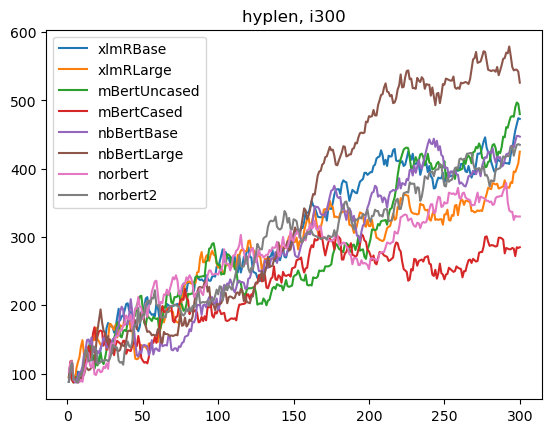

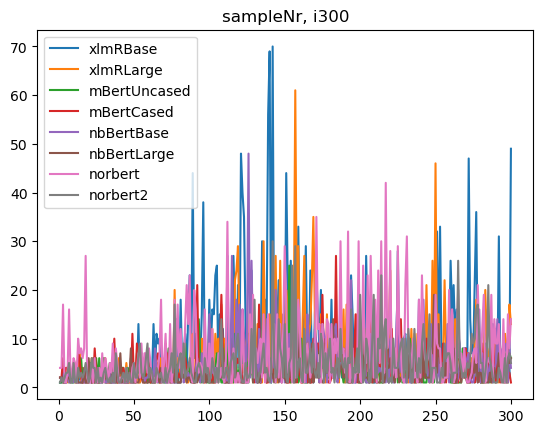

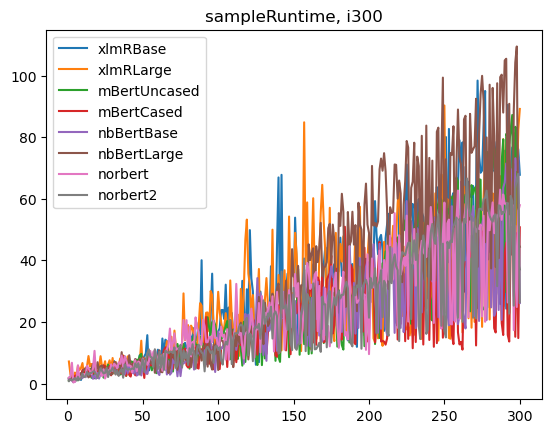

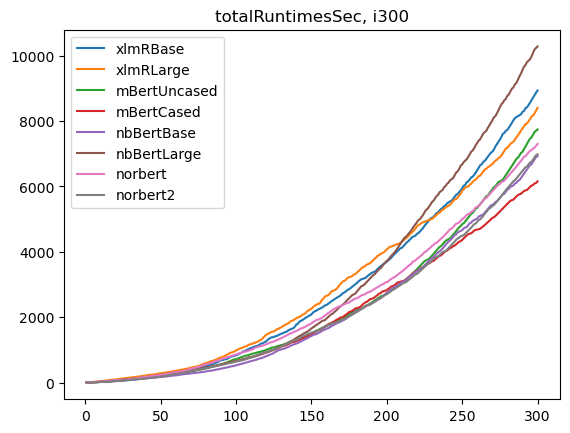

In [3]:
def comapreV0(lms, xdata, ydata,title):
    for y in ydata:
        plt.plot(xdata, y)
    plt.legend(lms)
    plt.title(title)
    plt.show()
comapreV0(lms, x300, hypLens, "hyplen, i300")
comapreV0(lms, x300, sampleNrs, "sampleNr, i300")
comapreV0(lms, x300, sampleRuntimes, "sampleRuntime, i300")
comapreV0(lms, x300, totalRuntimesSec, "totalRuntimesSec, i300")
# comapreV0(lms, x300, totalRuntimes, "totalRuntimes, i300")

In [4]:
# V1
lms_ = ["xlmRB", "xlmRL", "mBU", "mBC", "nbBB", "nbBL", "norb", "norb2"]
pos  = [[0,0],[1,0],[2,0],[3,0],[0,1],[1,1],[2,1],[3,1]]
def compareV1(xdata, ydata, lmtag, pos, ycap):
    for i in range(len(pos)):
        xpos, ypos = pos[i]
        axis[xpos,ypos].plot(xdata, ydata[i])
        axis[xpos,ypos].set_ylim((0,ycap))
        axis[xpos,ypos].set_title(lmtag[i], x=0.1, y=0.75)

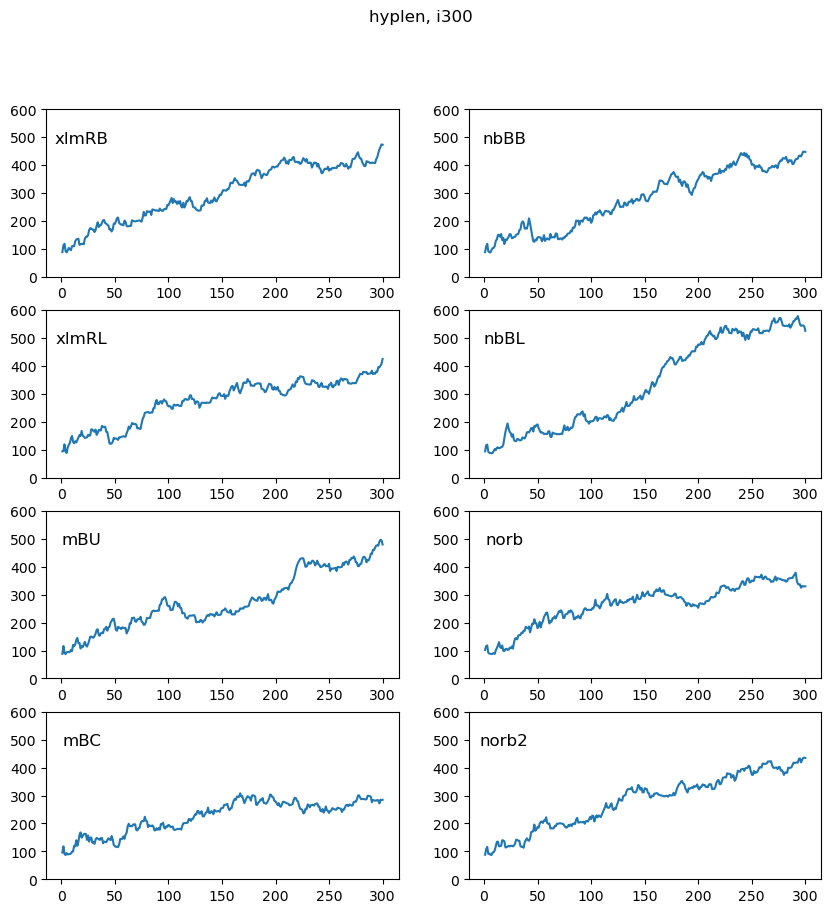

In [5]:
figure, axis = plt.subplots(4, 2, figsize=(10, 10))
figure.suptitle("hyplen, i300")
compareV1(x300, hypLens, lms_, pos, 600)

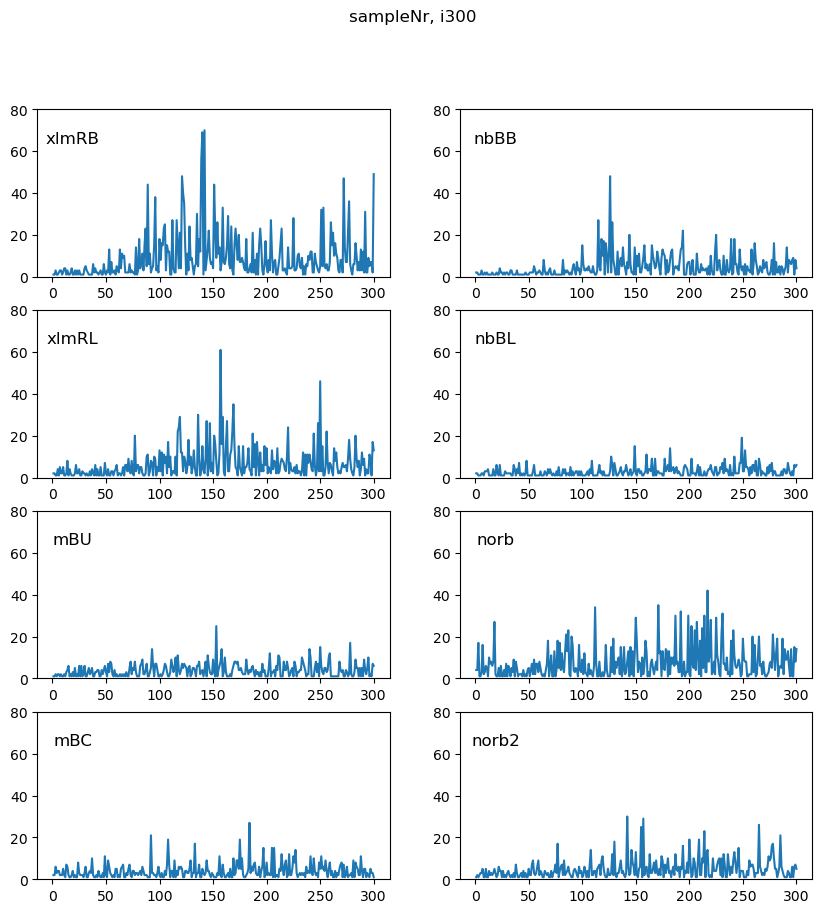

In [6]:
figure, axis = plt.subplots(4, 2, figsize=(10, 10))
figure.suptitle("sampleNr, i300")
compareV1(x300, sampleNrs, lms_, pos, 80)

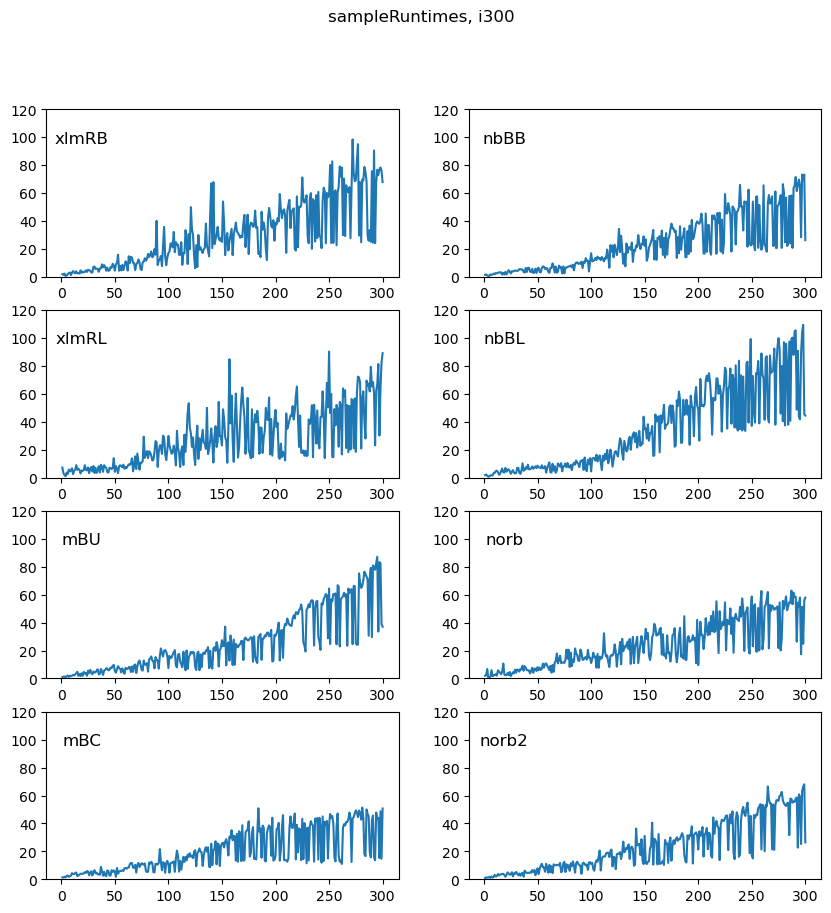

In [7]:
figure, axis = plt.subplots(4, 2, figsize=(10, 10))
figure.suptitle("sampleRuntimes, i300")
compareV1(x300, sampleRuntimes, lms_, pos, 120)

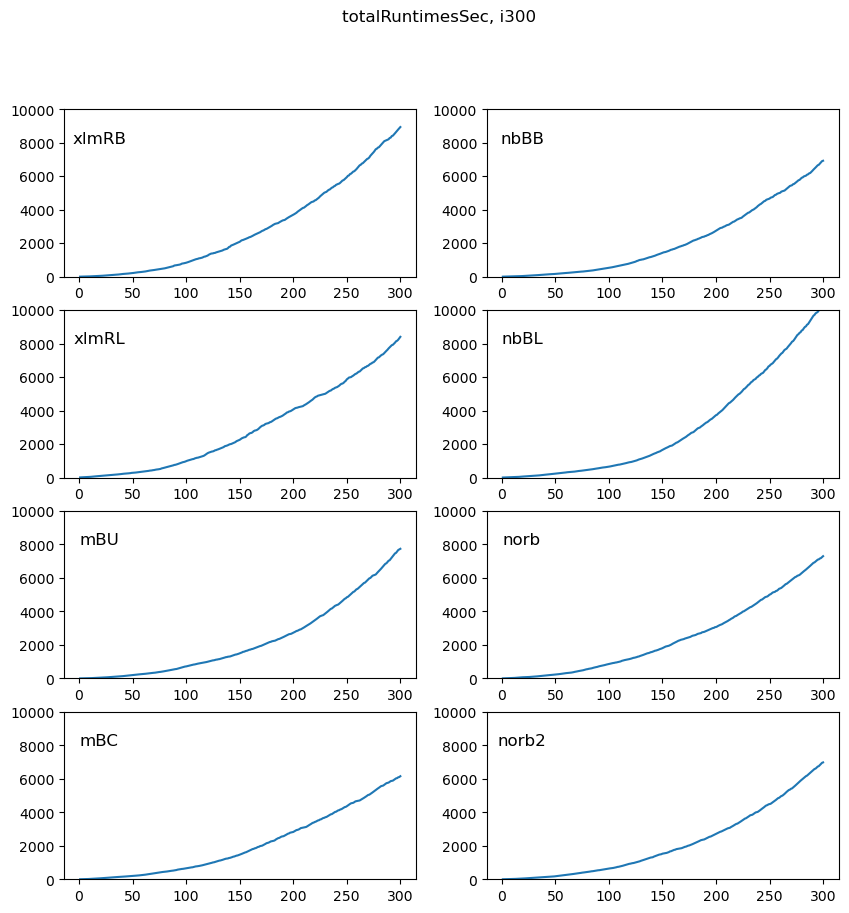

In [8]:
figure, axis = plt.subplots(4, 2, figsize=(10, 10))
figure.suptitle("totalRuntimesSec, i300")
compareV1(x300, totalRuntimesSec, lms_, pos, 10000)